# Visualizing Earnings Based On College Majors

I'll be working with a dataset on the job outcomes of students who graduated from American colleges between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college

Here are some of the columns in the dataset and what they mean;
- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.




In [10]:
#import the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#so that plots will be displayed inline
%matplotlib inline

In [12]:
#read the dataset into a dataFrame and explore
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head(10) #displays the first 10 rows in the dataframe

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [13]:
recent_grads.describe(include='all') #this line of code will generate summary statistics of the columns

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,GENERAL ENGINEERING,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [14]:
#check the number of missing values in the dataframe
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [6]:
#the dataframe has a very few number of missing values, I am going to drop them so as not to cause an error when using matplotlib
recent_grads = recent_grads.dropna()

In [7]:
#use pandas method to calculate the correlation between the columns and Sample_size
correlations = recent_grads.corr()
sample_size_correlations = correlations["Sample_size"]
print(sample_size_correlations)

Rank                    0.004590
Major_code              0.203375
Total                   0.945575
Men                     0.875176
Women                   0.862606
ShareWomen              0.097496
Sample_size             1.000000
Employed                0.964406
Full_time               0.978362
Part_time               0.824544
Full_time_year_round    0.985212
Unemployed              0.917934
Unemployment_rate       0.062955
Median                 -0.064475
P25th                  -0.024429
P75th                  -0.052256
College_jobs            0.701231
Non_college_jobs        0.915335
Low_wage_jobs           0.860116
Name: Sample_size, dtype: float64


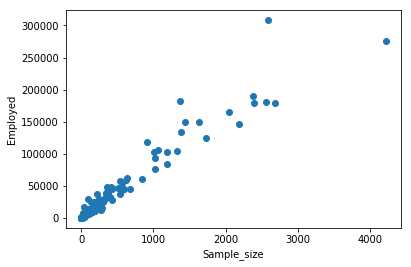

In [25]:
#scatter plot to explore the relationship between Sample_size and Employed and to visualize the calculated correlation
# from the calculation, the correlation is 0.964406
plt.scatter(x=recent_grads['Sample_size'], y=recent_grads['Employed'])
plt.xlabel('Sample_size')
plt.ylabel('Employed')
plt.show()

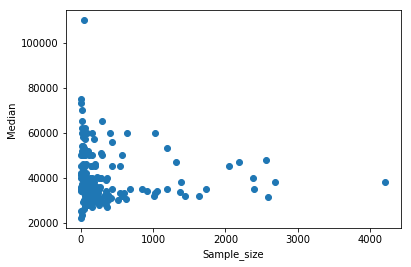

In [26]:
#scatter plot to explore the relationship between Sample_size and Median and to visualize the calculated correlation
# from the calculation, the correlation is -0.064475
plt.scatter(x=recent_grads['Sample_size'], y=recent_grads['Median'])
plt.xlabel('Sample_size')
plt.ylabel('Median')
plt.show()

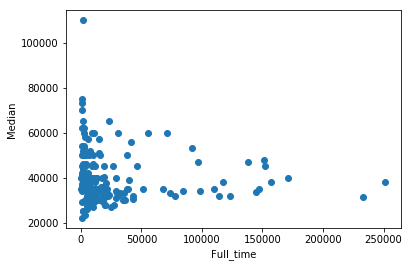

In [27]:
#scatter plot to explore the relationship between Full_time and Median
plt.scatter(x=recent_grads['Full_time'], y=recent_grads['Median'])
plt.xlabel('Full_time')
plt.ylabel('Median')
plt.show()

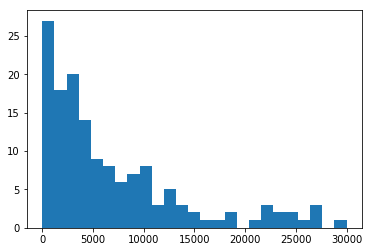

In [28]:
#histogram to check the distribution of men
recent_grads['Men'].hist(bins=25, range=(0, 30000), grid=False)

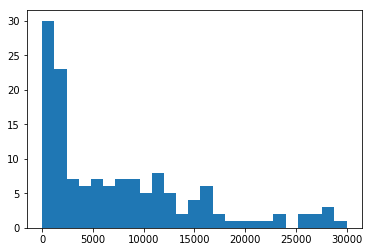

In [29]:
#histogram to check the distribution of women
recent_grads['Women'].hist(bins=25, range=(0, 30000), grid=False)

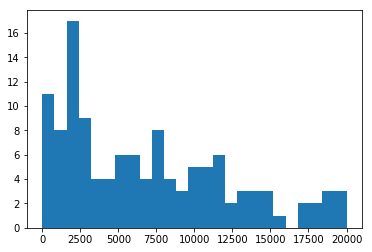

In [30]:
#histogram to check the distribution of people employed fulltime
recent_grads['Full_time'].hist(bins=25, range=(0, 20000), grid=False)

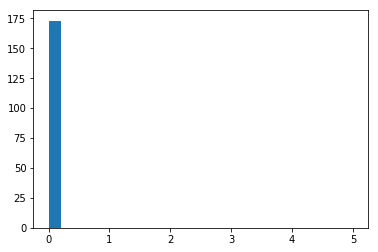

In [31]:
#histogram to check the distribution of people unemployed
recent_grads['Unemployment_rate'].hist(bins=25, range=(0, 5), grid=False)

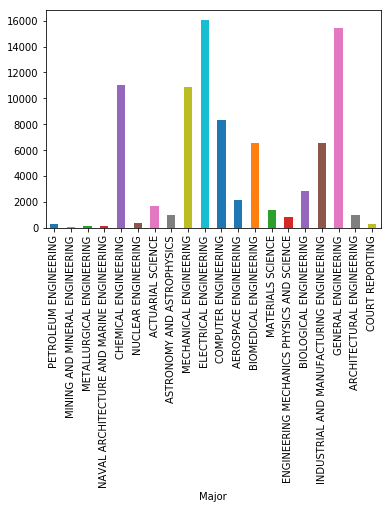

In [32]:
#barplots to know majors that had the most female students (first 20 because there are so many majors)
recent_grads[:20].plot.bar(x='Major', y='Women', legend=False)

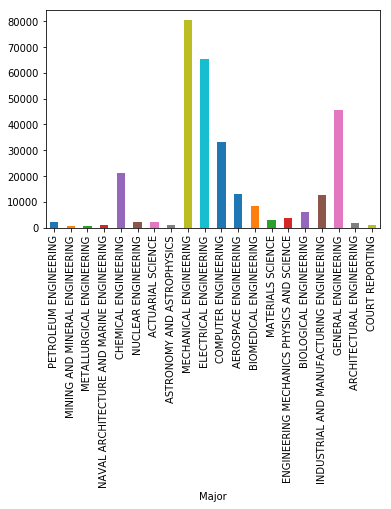

In [34]:
#barplots to know majors that had the most male students
recent_grads[:20].plot.bar(x='Major', y='Men', legend=False)